### Task 1
First use the algorithms written in class.

1. Use Gauss Elimination to solve the following equations.

$$\begin{gather}
3x_1−x_2+4x_3=2\\
17x_1+2x_2+x_3=14\\
x_1+12x_2−7x_3=54
\end{gather}$$
2. Write the Gauss-Jordan Elimination (**I mean full pivoting by it!**)to solve the above equations.
3. Find some clever way to visualize each step (eg. printin the augmented matrix or plotting a heatmap of the matrix at each step).
4. Get the lower triangular matrix $L$ and upper triangular matrix $U$ from the equations above.
5. Compare execution times for our vs numpy/scipy Gauss elimination! Go up with matrix sizes to at least $N=25$! To measure time:

```python
start = time.time()
# your code you want to time
stop = time.time()
tot_time = stop - start
```

Make a plot, where you plot the two lines representing the time needed for the different matrix sizes.

### Additional help

Here is a pseudo code that you can follow through to successfully implement the GE

```
Input: 
    A (n×n coefficient matrix)
    b (n×1 right-hand side vector)

Output:
    x (solution vector of length n)

Algorithm:

1. Form the augmented matrix B = [A | b].

2. Initialize column permutation record: col_perm = [0, 1, ..., n-1].

3. For k = 0 to n-1 do:
    
    a. Pivoting (choose best pivot):
        - Search the submatrix B[k:n, k:n] for the element with 
          the largest absolute value.
        - Let (i_max, j_max) be the position of this pivot.
        - If pivot value is 0 → the system has no unique solution.
    
    b. Swap rows if needed:
        - Swap row k with row i_max in B.

    c. Swap columns if needed:
        - Swap column k with column j_max in B.
        - Record this swap in col_perm (to undo later).
    
    d. Normalize pivot row:
        - Divide row k by the pivot value so that B[k, k] = 1.

    e. Eliminate all other entries in column k:
        - For each row i ≠ k:
            - Subtract (B[i, k] × row k) from row i.
        - This ensures that column k has zeros everywhere except at the pivot.

4. At this point, the left side of B is the identity matrix.
   The rightmost column contains the solution vector, but
   in permuted order (because of column swaps).

5. Undo column permutations:
    - Initialize x as a zero vector of length n.
    - For i = 0 to n-1:
        - Place solution entry b[i] into position col_perm[i] of x.

6. Return x.
```

To make the code modular, you can write functions tht perform only one subtast, eg. `swap_rows_and_cols()`, `add_rows_and_cols()`, `plot_state()` etc.

In [ ]:
%pip install matplotlib --quiet


Note: you may need to restart the kernel to use updated packages.
^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


Step 1 (unnormalized, truncated):
  1.0   0.1   0.1   0.8
  0.0  -1.4   3.8  -0.5
  0.0  11.9  -7.1  53.2

Step 2 (unnormalized, truncated):
  1.0   0.0   0.1   0.3
  0.0   1.0  -0.6   4.5
  0.0   0.0   3.0   5.6

Step 3 (unnormalized, truncated):
  1.0   0.0   0.0   0.1
  0.0   1.0   0.0   5.6
  0.0   0.0   1.0   1.8


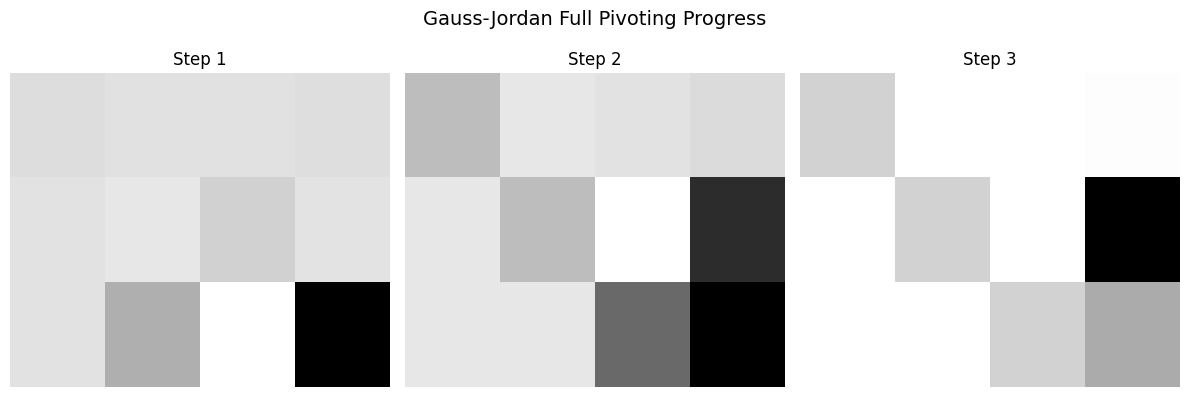


Final Solution: [0.059016 5.57377  1.84918 ]

L (sample 10x11):
  1.00   0.00   0.00
  0.06   1.00   0.00
  0.18  -0.11   1.00

U (sample 10x11):
 17.00   2.00   1.00
  0.00  11.88  -7.06
  0.00   0.00   3.02

Step 1 (unnormalized, truncated):
  1.0   0.5   0.9   0.8   0.9   0.4   0.8   0.4   0.5   0.6   0.9
  0.0 -34.7 -41.7  27.7  22.4  51.3 -40.7 -17.8  25.2  38.5 -20.1
  0.0   1.8  27.7   8.4  47.7  96.8  27.4  78.4  22.4  64.2  70.5
  0.0   5.3  64.1   7.1  69.8  10.7  68.9  59.9  44.4  25.6  73.4
  0.0  86.6  49.7  22.3  -0.5  74.5  51.3  47.7  82.7  70.1   3.0
  0.0 -11.1  11.9  20.7 -41.2  46.9   5.0  -0.6   3.7 -22.2  34.7
  0.0  -7.2  17.7  26.7  33.5  58.7  60.8  75.5  24.7 -15.3  61.4
  0.0  10.7  -7.9  37.6  52.3   6.6  10.5  -4.1  -4.1  21.4   2.3
  0.0  64.1   1.7  73.4 -11.3  11.9 -12.1  38.9  46.6  -6.3  59.6
  0.0  59.8  45.0 -15.1  -3.8  15.3  50.1  -7.0  -0.3  66.0  -1.6
 ...

Step 2 (unnormalized, truncated):
  1.0   0.0   0.9   0.8   0.9   0.3   0.8   0.4   0.5  

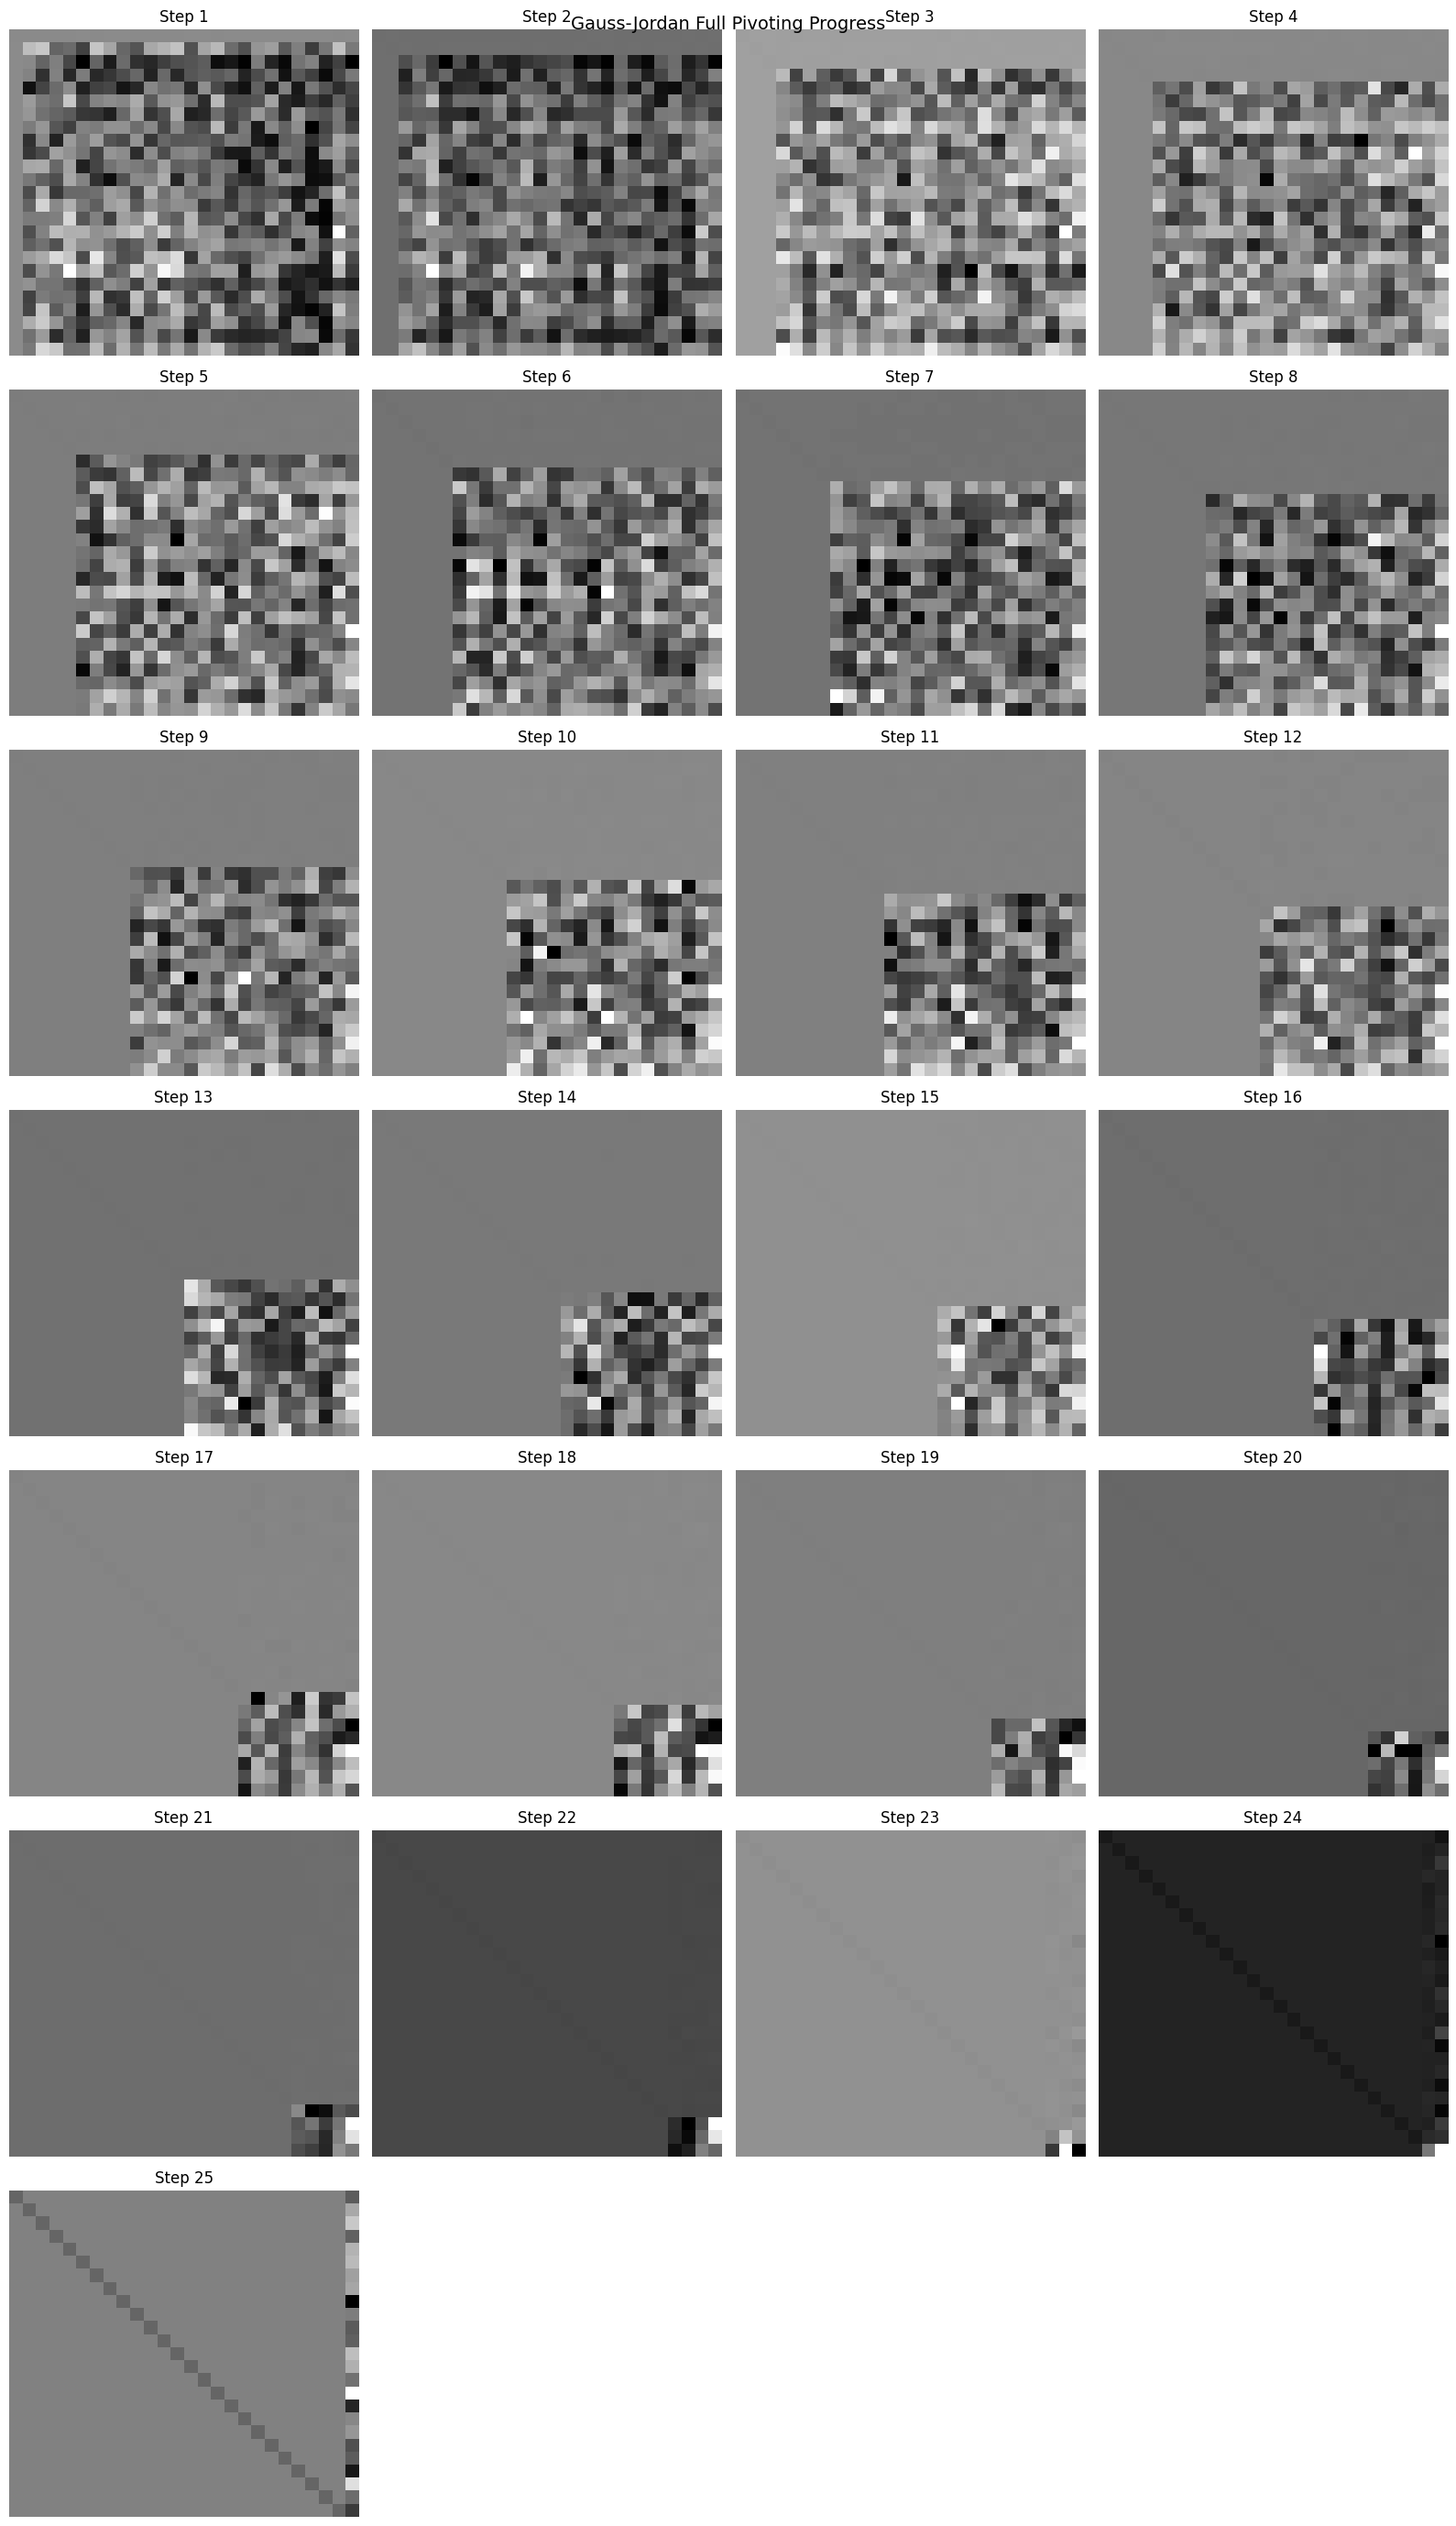


Final Solution: [-2.586105  1.331972 -4.598394 -1.118352  1.351645 -3.430932  0.144549
 -1.34657   3.842773 -0.770344 -1.692521  1.178887  2.588255  1.378045
  0.747529  0.559682  3.334193  1.159059 -0.209113 -1.838756  4.701956
 -2.220299 -1.420295 -2.082174  1.774874]

L (sample 10x11):
  1.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
  0.06   1.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
  0.55   0.75   1.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
  0.86   0.05  -0.55   1.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
  0.81   0.41   0.74   0.78   1.00   0.00   0.00   0.00   0.00   0.00   0.00
  0.44   0.35  -0.27   0.69   0.89   1.00   0.00   0.00   0.00   0.00   0.00
  0.21   0.00  -0.13  -0.36  -0.23   0.56   1.00   0.00   0.00   0.00   0.00
  0.16   0.73   0.04   0.82   0.27   0.34   0.10   1.00   0.00   0.00   0.00
  0.54  -0.01  -0.17   0.51  -0.02   0.75  -0.05  -0.53   1.00   0.00   0.00
  0.48   0.84   

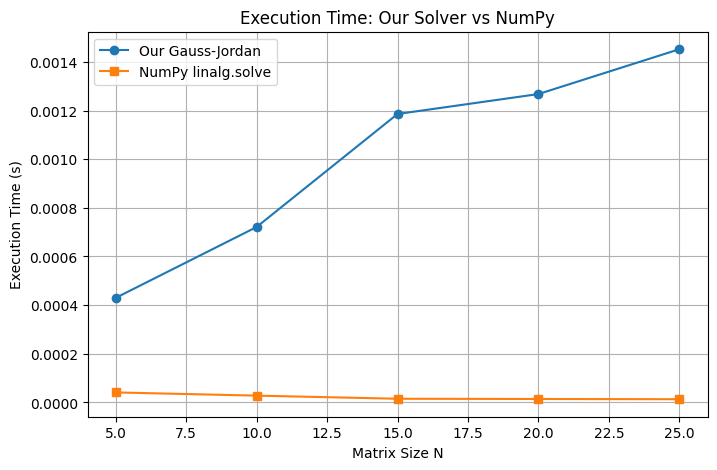

In [ ]:
# ------------------ Visualization ------------------
snapshots = []
def normalize_matrix(M: np.ndarray) -> np.ndarray:
    M = M.copy()
    min_val, max_val = np.min(M), np.max(M)
    if abs(max_val - min_val) < 1e-12:  # avoid divide by zero
        return np.zeros_like(M)
    normalized = (M - min_val) / (max_val - min_val)
    return 1 - normalized

def format_matrix(M: np.ndarray, max_rows: int = 10, max_cols: int = 11, decimals: int = 1) -> str:
    M = np.round(M, decimals)
    rows, cols = M.shape
    shown = M[:max_rows, :max_cols]
    lines = []
    for row in shown:
        lines.append(" ".join(f"{val:5.1f}" for val in row))
    if rows > max_rows:
        lines.append(" ...")
    return "\n".join(lines)

def plot_progress(matrices, title="Gauss-Jordan Elimination"):
    n = len(matrices)
    cols = min(4, n)  # up to 4 per row
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    if rows == 1:
        axes = np.atleast_1d(axes)

    for i, M in enumerate(matrices):
        # Print compact numeric version
        print(f"\nStep {i+1} (unnormalized, truncated):")
        print(format_matrix(M))

        # Plot normalized version
        ax = axes.flat[i]
        ax.imshow(normalize_matrix(M), cmap="gray", aspect="auto")
        ax.set_title(f"Step {i+1}")
        ax.axis("off")

    # Hide unused subplots
    for j in range(i+1, rows*cols):
        axes.flat[j].axis("off")

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# ------------------ Algorithm Steps ------------------

# Step 1: Form augmented matrix
def step_1_augment(A, b):
    return np.hstack([A.astype(float), b.reshape(-1, 1).astype(float)])

# Step 2: Initialize column permutation
def step_2_init_perm(n):
    return list(range(n))

# Step 3a: Pivoting
def step_3a_find_pivot(M, k):
    sub = np.abs(M[k:, k:M.shape[1]-1])  # exclude last col (b)
    i_max, j_max = np.unravel_index(np.argmax(sub), sub.shape)
    return i_max + k, j_max + k

# Step 3b: Swap rows
def step_3b_swap_rows(M, k, i_max):
    if i_max != k:
        M[[k, i_max]] = M[[i_max, k]]

# Step 3c: Swap columns
def step_3c_swap_cols(M, k, j_max, col_perm):
    if j_max != k:
        M[:, [k, j_max]] = M[:, [j_max, k]]
        col_perm[k], col_perm[j_max] = col_perm[j_max], col_perm[k]

# Step 3d: Normalize pivot row
def step_3d_normalize_pivot(M, k):
    M[k] = M[k] / M[k, k]

# Step 3e: Eliminate column
def step_3e_eliminate_column(M, k):
    n = M.shape[0]
    for i in range(n):
        if i != k:
            M[i] -= M[i, k] * M[k]

# Step 5: Undo column permutations
def step_5_undo_permutation(M, col_perm):
    n = len(col_perm)
    x = np.zeros(n)
    for i in range(n):
        x[col_perm[i]] = M[i, -1]
    return x

# Step 6: Return solution
def step_6_return_solution(x):
    return x

# ------------------ Solver ------------------
def gauss_jordan_full_pivot(A, b, visualize=False):
    n = len(b)

    # Step 1
    M = step_1_augment(A, b)
    # Step 2
    col_perm = step_2_init_perm(n)

    # Step 3 (loop)
    for k in range(n):
        # a. Find pivot
        i_max, j_max = step_3a_find_pivot(M, k)
        # b. Swap rows
        step_3b_swap_rows(M, k, i_max)
        # c. Swap columns
        step_3c_swap_cols(M, k, j_max, col_perm)
        # d. Normalize pivot
        step_3d_normalize_pivot(M, k)
        # e. Eliminate column
        step_3e_eliminate_column(M, k)

        # Optional visualization
        if visualize:
            snapshots.append(M.copy())


    # Step 5
    x = step_5_undo_permutation(M, col_perm)
    # Step 6
    solution = step_6_return_solution(x)

    if visualize and snapshots:
        plot_progress(snapshots, "Gauss-Jordan Full Pivoting Progress")
        snapshots.clear()
    
    return solution


# ------------------ Lower/Upper Triangle ------------------ 
def lu_decomposition(A):
    A = A.astype(float)
    n = A.shape[0]
    
    L = np.eye(n)
    U = A.copy()
    
    for k in range(n):
        # Partial pivoting (swap rows if needed)
        max_row = np.argmax(np.abs(U[k:, k])) + k
        if max_row != k:
            U[[k, max_row]] = U[[max_row, k]]
            if k > 0:
                L[[k, max_row], :k] = L[[max_row, k], :k]  # swap previous multipliers
        
        # Eliminate rows below pivot
        for i in range(k+1, n):
            multiplier = U[i, k] / U[k, k]
            L[i, k] = multiplier
            U[i, k:] -= multiplier * U[k, k:]
    
    return L, U



# ------------------ Running test ------------------
def solve_and_decompose(A, b, visualize=True):
    # --- Step 1: Solve using Gauss-Jordan full pivoting ---
    x = gauss_jordan_full_pivot(A, b, visualize=visualize)
    print("\nFinal Solution:", np.round(x, 6))
    
    # --- Step 2: LU Decomposition ---
    L, U = lu_decomposition(A)
    
    # --- Helper to print truncated matrix ---
    def print_matrix_sample(name, M, rows=10, cols=11):
        sample = M[:rows, :cols]
        print(f"\n{name} (sample {rows}x{cols}):")
        for row in sample:
            print(" ".join(f"{val:6.2f}" for val in row))
    
    print_matrix_sample("L", L)
    print_matrix_sample("U", U)
    
    return x, L, U


A = np.array([[3, -1, 4],
              [17, 2, 1],
              [1, 12, -7]])
b = np.array([2, 14, 54])

x, L, U = solve_and_decompose(A, b, visualize=True)

def generate_test_matrix(N, seed=None):
    if seed is not None:
        np.random.seed(seed)
    A = np.random.rand(N, N) * 100  # random float numbers 0–100
    b = np.random.rand(N) * 100
    return A, b

x, L, U = solve_and_decompose(*generate_test_matrix(25), visualize=True)


# ------------------ Performance test ------------------
def time_solver(solver_func, A, b, visualize=False):
    start = time.time()
    solver_func(A, b, visualize=visualize)
    stop = time.time()
    return stop - start

# Test for different matrix sizes
def performance_test(solver_func, sizes=[5, 10, 15, 20, 25], seed=42, visualize=False):
    our_times = []
    numpy_times = []

    for N in sizes:
        # Generate random NxN matrix and b
        A, b = generate_test_matrix(N, seed=seed)

        # Time our solver
        t_our = time_solver(solver_func, A, b, visualize=visualize)
        our_times.append(t_our)

        # Time NumPy solver
        start = time.time()
        np.linalg.solve(A, b)
        stop = time.time()
        numpy_times.append(stop - start)

        print(f"N={N}: Our solver={t_our:.6f}s, NumPy={numpy_times[-1]:.6f}s")

    # Plot results
    plt.figure(figsize=(8,5))
    plt.plot(sizes, our_times, 'o-', label='Our Gauss-Jordan')
    plt.plot(sizes, numpy_times, 's-', label='NumPy linalg.solve')
    plt.xlabel("Matrix Size N")
    plt.ylabel("Execution Time (s)")
    plt.title("Execution Time: Our Solver vs NumPy")
    plt.legend()
    plt.grid(True)
    plt.show()

performance_test(solve_and_decompose, sizes=[5, 10, 15, 20, 25], visualize=False)